<a href="https://colab.research.google.com/github/Devam19/Grocery_prediction/blob/main/Dmt_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
Path = 'drive/MyDrive/dataset'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv (Path+'/Groceries_dataset.csv')

In [5]:
data.shape

(38765, 3)

In [6]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
data.sort_values(by=['Date'])

,Member_number,Date,itemDescription
13581,4942,01-01-2014,butter
9557,1922,01-01-2014,tropical fruit
30568,3797,01-01-2014,whole milk
13449,2237,01-01-2014,bottled water
9172,2226,01-01-2014,sausage
...,...,...,...
3049,3122,31-10-2015,chicken
785,1981,31-10-2015,chicken
16087,1787,31-10-2015,chocolate
19198,3122,31-10-2015,bottled beer


In [8]:
#data_eda = data.copy()
data_eda = pd.read_csv(Path+'/Groceries_dataset.csv',index_col='Date', parse_dates=True)
data_eda.head()

<ipython-input-8-6bed32274ad6>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_eda = pd.read_csv(Path+'/Groceries_dataset.csv',index_col='Date', parse_dates=True)


,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [9]:
#Number of unique Costumers and Items
print(data_eda.Member_number.nunique())
print(data_eda.itemDescription.nunique())

3898
167


In [10]:
#Creating new columns based on the date column
data_eda['year'] = data_eda.index.year
data_eda['month'] = data_eda.index.month
data_eda['day'] = data_eda.index.day
data_eda['weekday'] = data_eda.index.strftime('%A')
data_eda['monthName'] = data_eda.index.strftime('%B')
data_eda.head()

,Member_number,itemDescription,year,month,day,weekday,monthName
Date,,,,,,,
2015-07-21,1808,tropical fruit,2015,7,21,Tuesday,July
2015-05-01,2552,whole milk,2015,5,1,Friday,May
2015-09-19,2300,pip fruit,2015,9,19,Saturday,September
2015-12-12,1187,other vegetables,2015,12,12,Saturday,December
2015-01-02,3037,whole milk,2015,1,2,Friday,January


In [11]:
data_eda['year'].value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

Text(0.5, 1.0, 'Sales in months')

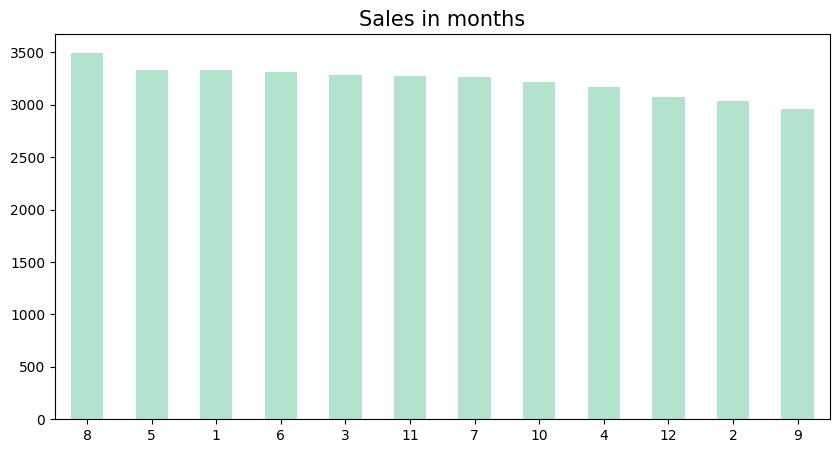

In [12]:
plt.figure(figsize=(10, 5))
data_eda['month'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in months', size=15)

Text(0.5, 1.0, 'Sales in Weekdays')

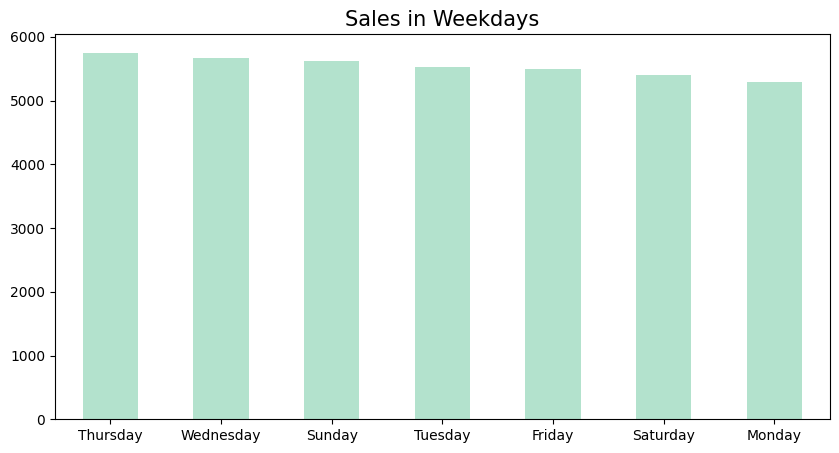

In [13]:
plt.figure(figsize=(10, 5))
data_eda['weekday'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in Weekdays', size=15)

Text(0.5, 1.0, 'Sales in Days')

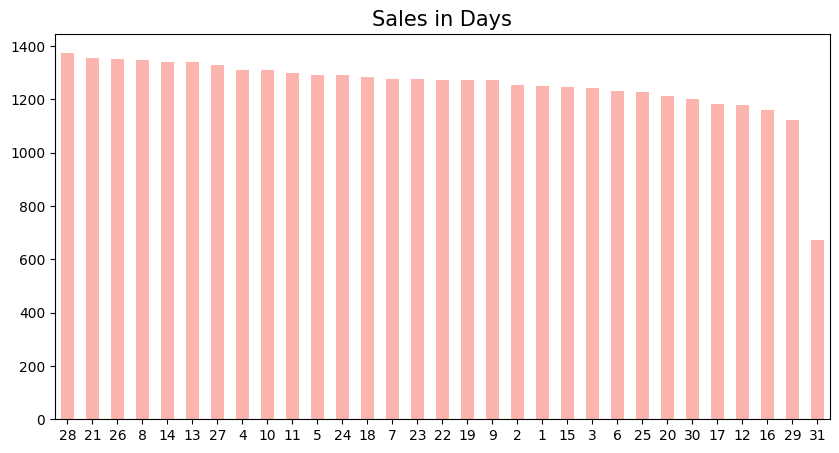

In [14]:
plt.figure(figsize=(10, 5))
data_eda['day'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel1')
plt.title('Sales in Days', size=15)

In [15]:
df1 = pd.DataFrame(data_eda['itemDescription'].value_counts().head(50)).reset_index()
df1.columns =['itemDescription','Count']
df1.head()

,itemDescription,Count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


Text(0, 0.5, 'Quantity')

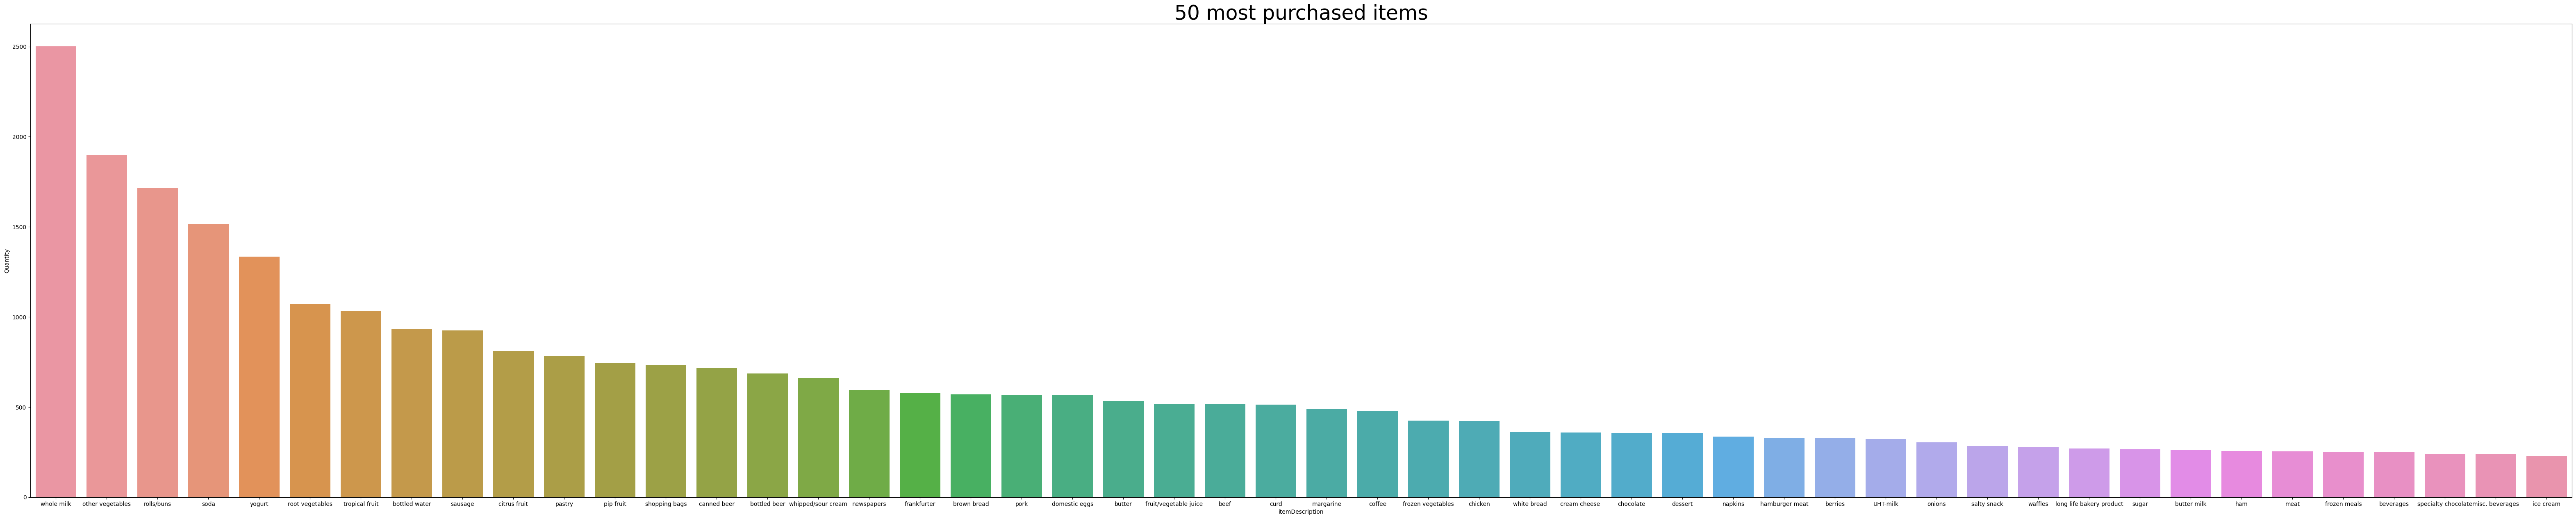

In [16]:
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df1)
plt.title('50 most purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

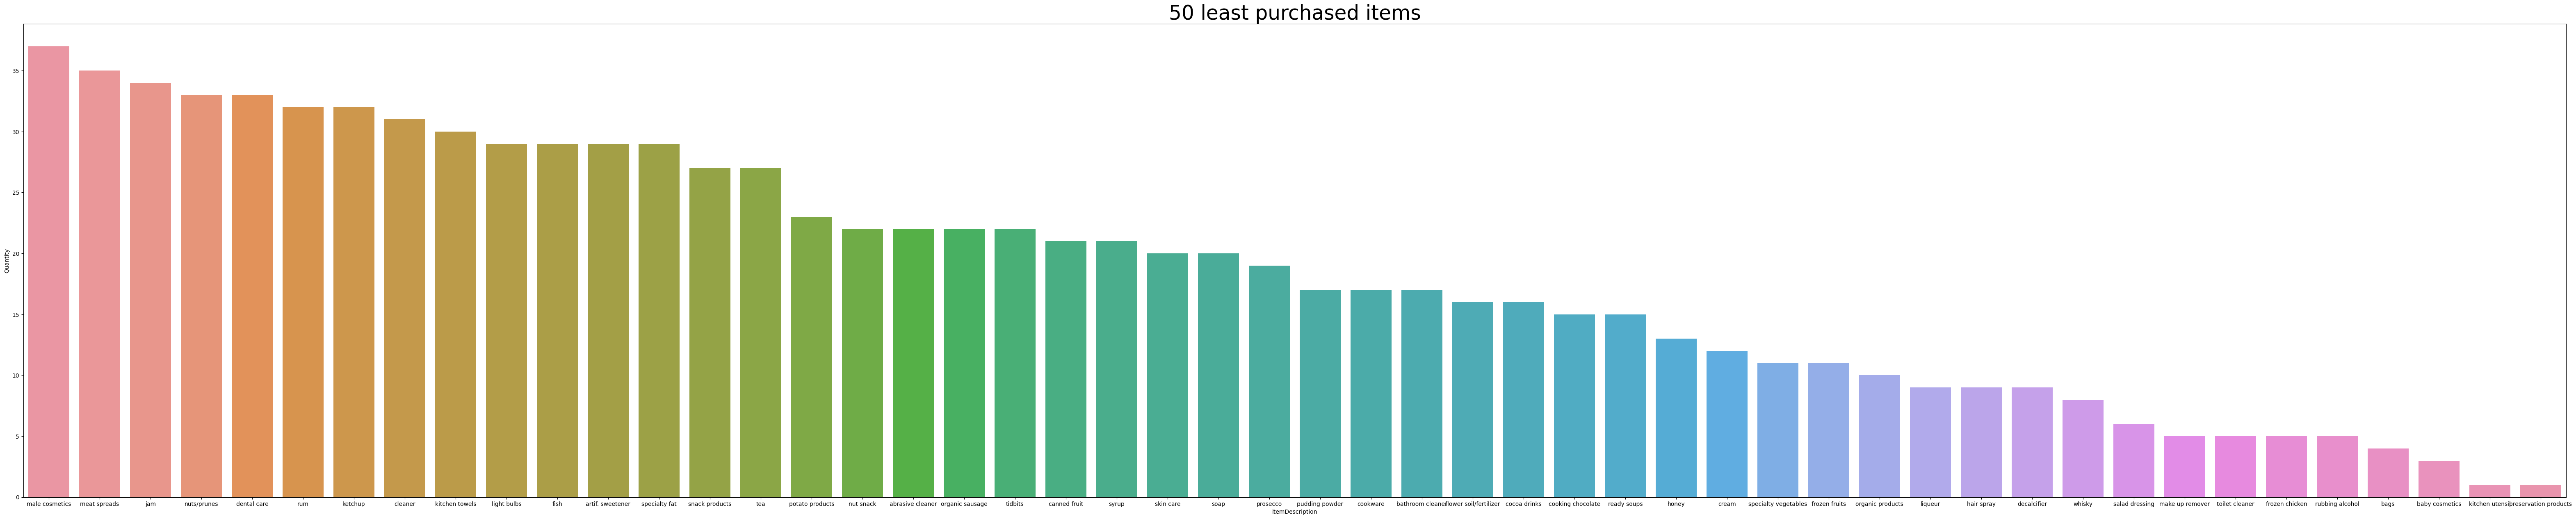

In [17]:
df2 = pd.DataFrame(data_eda['itemDescription'].value_counts().tail(50)).reset_index()
df2.columns =['itemDescription','Count']
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df2)
plt.title('50 least purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

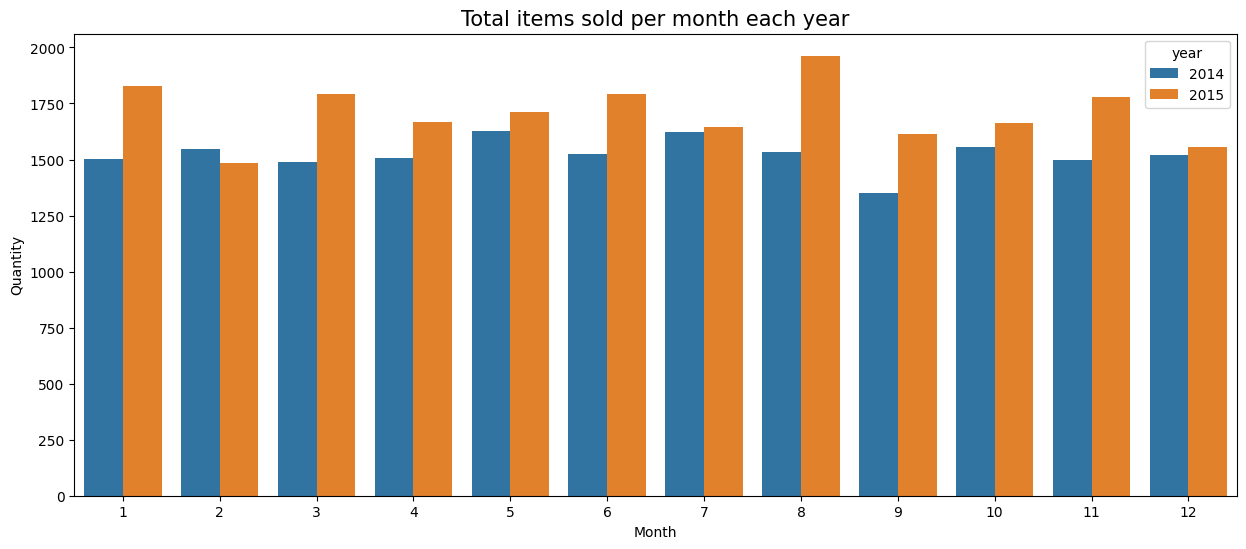

In [18]:
#Total items sold per month each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='month', hue='year', data=data_eda)
plt.title('Total items sold per month each year', size=15)
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

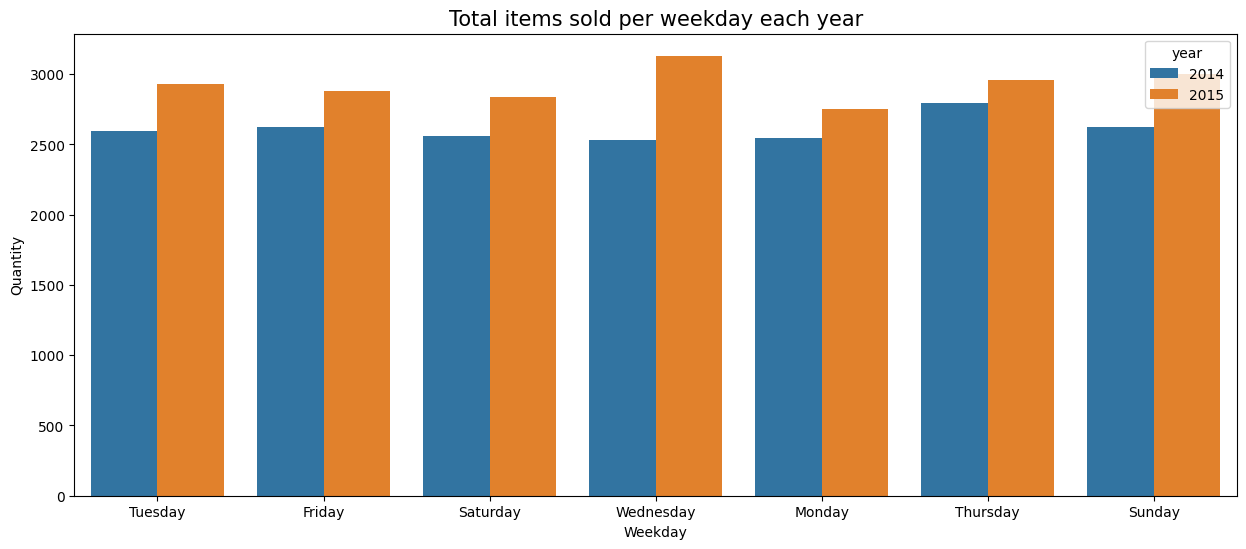

In [19]:
#Total items sold per weekday each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='weekday', hue='year', data=data_eda)
plt.title('Total items sold per weekday each year', size=15)
plt.xlabel('Weekday')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

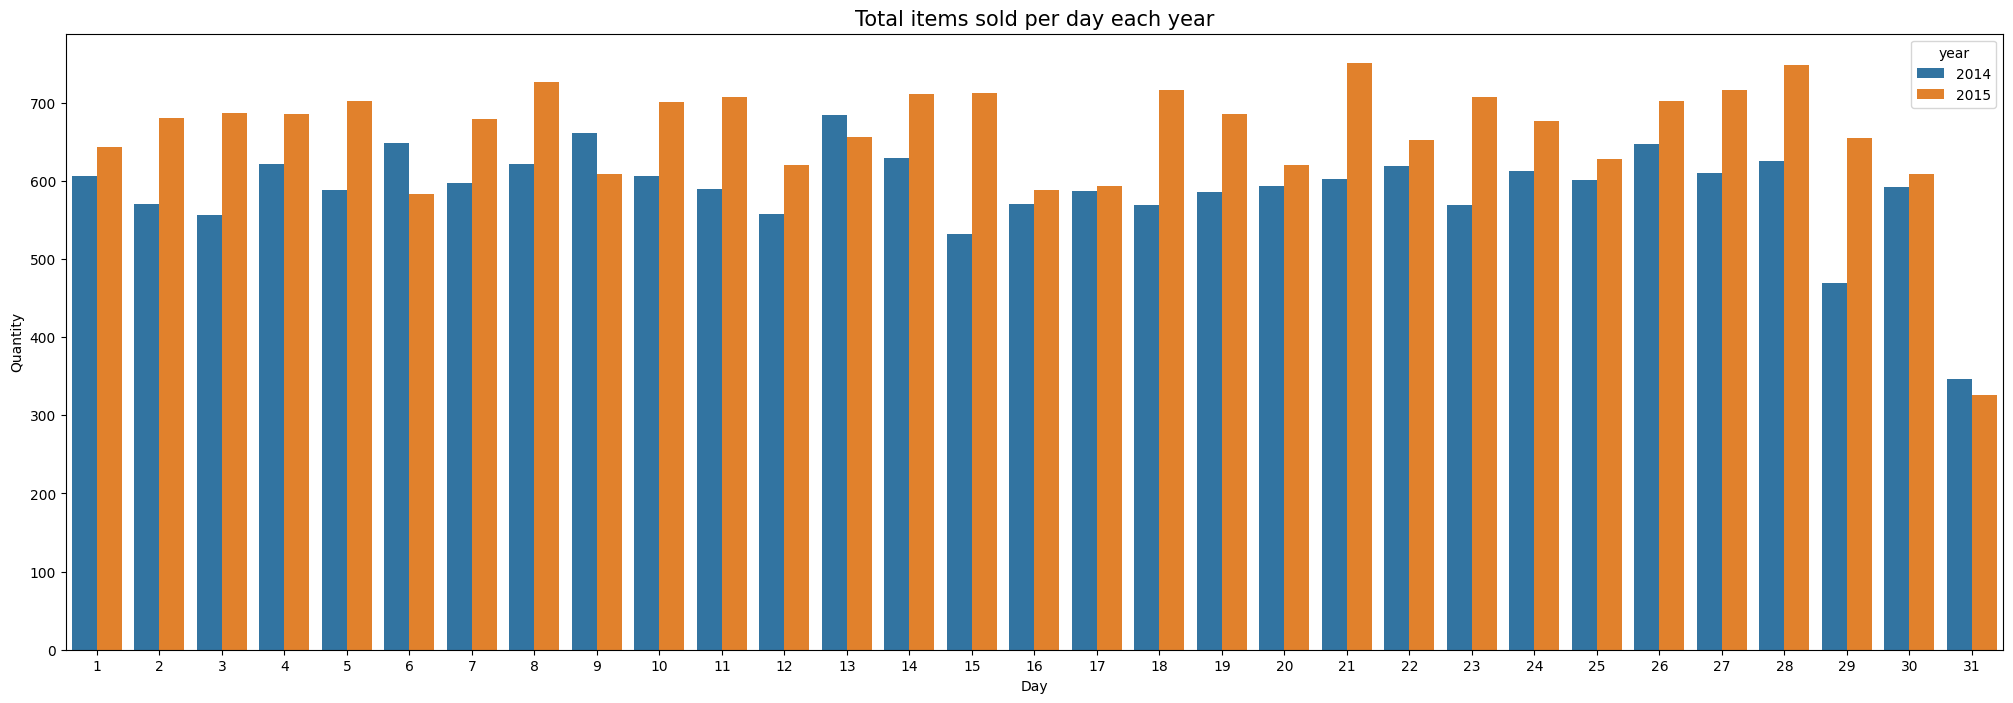

In [20]:
#Total items sold per day each year
plt.figure(figsize=(25,8))
ax = sns.countplot(x='day', hue='year', data=data_eda)
plt.title('Total items sold per day each year', size=15)
plt.xlabel('Day')
plt.ylabel('Quantity')

In [21]:
total_items = len(data_eda)
total_days = len(np.unique(data_eda.index.date))
total_months = len(np.unique(data_eda.index.month))
average_items = total_items / total_days
unique_items = data_eda.itemDescription.unique().size

print("Total {} items sold in {} days throughout 2 years".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))


Total 38765 items sold in 728 days throughout 2 years
With an average of 53.24862637362637 items sold daily


Text(0, 0.5, 'Quantity Purchased')

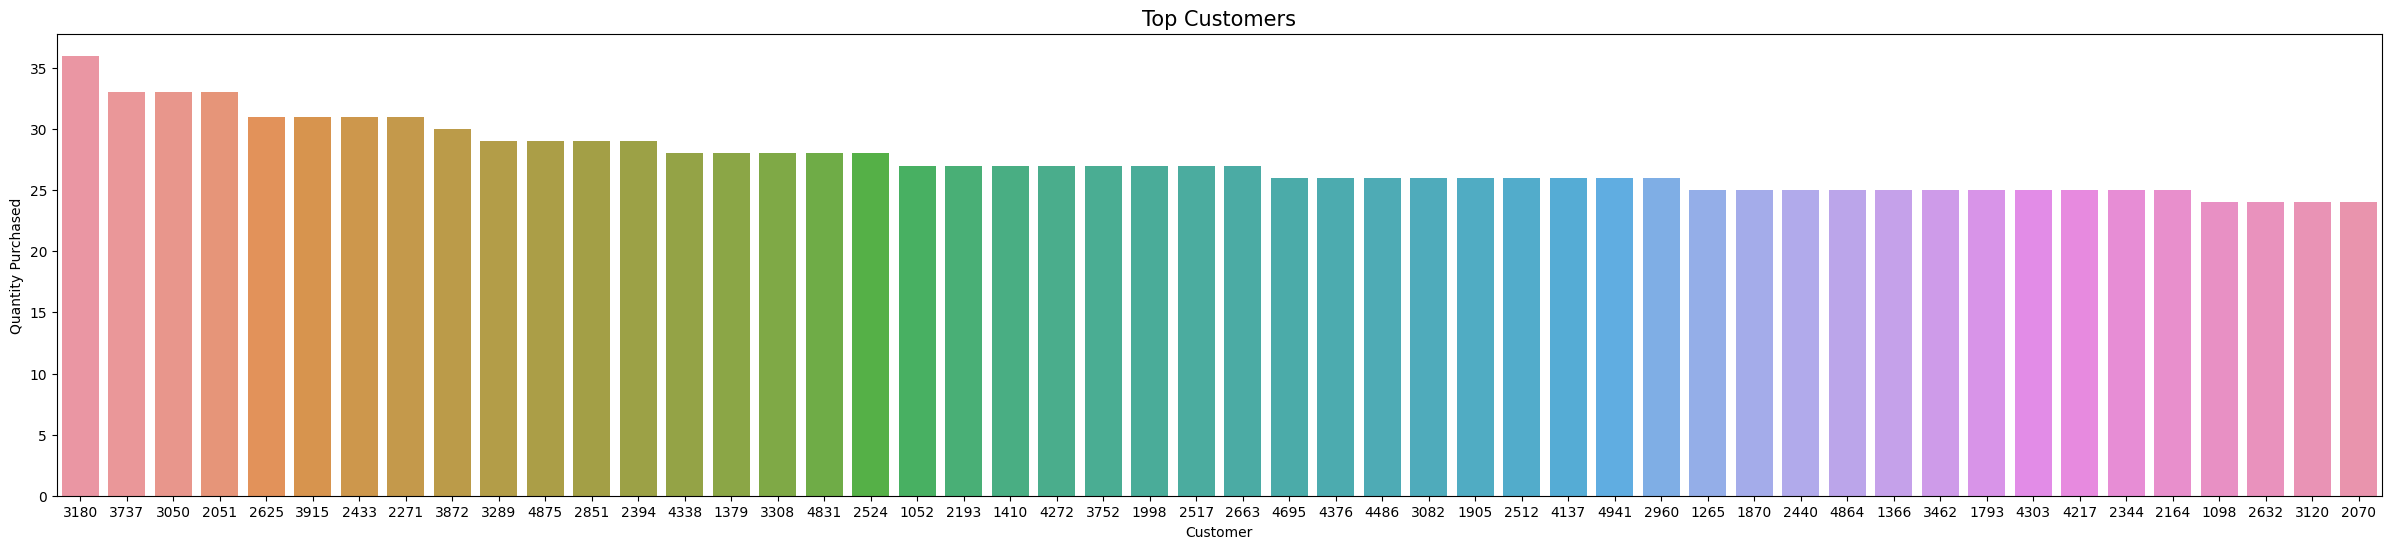

In [22]:
#Top Customers
plt.figure(figsize=(30,6))
ax = sns.countplot(x='Member_number', data=data_eda, order=data_eda.Member_number.value_counts().iloc[:50].index)
plt.title('Top Customers', size=15)
plt.xlabel('Customer')
plt.ylabel('Quantity Purchased')

Apriori Model

In [26]:
user_id = input()

2005


In [28]:
df3 = data.loc[data['Member_number'] == int(user_id)]

In [29]:
df3

,Member_number,Date,itemDescription
4827,2005,22-09-2015,bottled beer
5248,2005,20-04-2015,pork
8379,2005,22-09-2015,jam
10202,2005,18-10-2014,mustard
12082,2005,22-11-2014,brown bread
20976,2005,22-09-2015,male cosmetics
21397,2005,20-04-2015,yogurt
24528,2005,22-09-2015,dessert
26351,2005,18-10-2014,yogurt
28231,2005,22-11-2014,rolls/buns


In [30]:
df3.shape

(13, 3)

In [31]:
df3.values

array([[2005, '22-09-2015', 'bottled beer'],
       [2005, '20-04-2015', 'pork'],
       [2005, '22-09-2015', 'jam'],
       [2005, '18-10-2014', 'mustard'],
       [2005, '22-11-2014', 'brown bread'],
       [2005, '22-09-2015', 'male cosmetics'],
       [2005, '20-04-2015', 'yogurt'],
       [2005, '22-09-2015', 'dessert'],
       [2005, '18-10-2014', 'yogurt'],
       [2005, '22-11-2014', 'rolls/buns'],
       [2005, '18-10-2014', 'cat food'],
       [2005, '18-10-2014', 'bottled beer'],
       [2005, '20-04-2015', 'soda']], dtype=object)

In [32]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Date']))]

<ipython-input-32-3c0b478fe5d8>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Date']))]


In [33]:
transactions

[['mustard', 'yogurt', 'cat food', 'bottled beer'],
 ['pork', 'yogurt', 'soda'],
 ['bottled beer', 'jam', 'male cosmetics', 'dessert'],
 ['brown bread', 'rolls/buns']]

In [34]:
from mlxtend.preprocessing import TransactionEncoder

In [35]:
te = TransactionEncoder()

In [36]:
te_ary = te.fit(transactions).transform(transactions)

In [37]:
te.columns_

['bottled beer',
 'brown bread',
 'cat food',
 'dessert',
 'jam',
 'male cosmetics',
 'mustard',
 'pork',
 'rolls/buns',
 'soda',
 'yogurt']

In [38]:
te_ary

array([[ True, False,  True, False, False, False,  True, False, False,
        False,  True],
       [False, False, False, False, False, False, False,  True, False,
         True,  True],
       [ True, False, False,  True,  True,  True, False, False, False,
        False, False],
       [False,  True, False, False, False, False, False, False,  True,
        False, False]])

In [39]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,bottled beer,brown bread,cat food,dessert,jam,male cosmetics,mustard,pork,rolls/buns,soda,yogurt
0,True,False,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,False,True,True
2,True,False,False,True,True,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False


In [40]:
#Count is the total no of transactions in each colums, and freq is the no of times *TOP variable* appeared in that column
pf = transactions.describe()
pf


,bottled beer,brown bread,cat food,dessert,jam,male cosmetics,mustard,pork,rolls/buns,soda,yogurt
count,4,4,4,4,4,4,4,4,4,4,4
unique,2,2,2,2,2,2,2,2,2,2,2
top,True,False,False,False,False,False,False,False,False,False,True
freq,2,3,3,3,3,3,3,3,3,3,2


In [41]:
#Count - Freq from above table - to find no of TRUE values
pf.iloc[0]-pf.iloc[3]

bottled beer      2
brown bread       1
cat food          1
dessert           1
jam               1
male cosmetics    1
mustard           1
pork              1
rolls/buns        1
soda              1
yogurt            2
dtype: object

In [42]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False)

In [43]:
item

,Count,Item
0,2,bottled beer
10,2,yogurt
1,1,brown bread
2,1,cat food
3,1,dessert
4,1,jam
5,1,male cosmetics
6,1,mustard
7,1,pork
8,1,rolls/buns


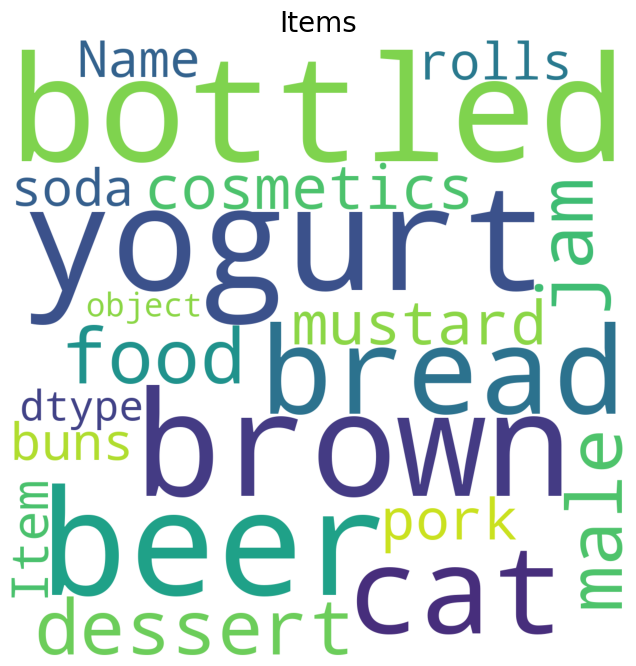

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [46]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
#support = particular itemset/ total no of transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
freq_items.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38, 2)

In [48]:
freq_items.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.50,(bottled beer)
1,0.25,(brown bread)
2,0.25,(cat food)
3,0.25,(dessert)
4,0.25,(jam)
5,0.25,(male cosmetics)
6,0.25,(mustard)
7,0.25,(pork)
8,0.25,(rolls/buns)
9,0.25,(soda)


In [49]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
freq_items['length'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 2, 3, 4])

In [51]:
freq_items.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.50,(bottled beer),1
1,0.25,(brown bread),1
2,0.25,(cat food),1
3,0.25,(dessert),1
4,0.25,(jam),1
5,0.25,(male cosmetics),1
6,0.25,(mustard),1
7,0.25,(pork),1
8,0.25,(rolls/buns),1
9,0.25,(soda),1


In [52]:
length = freq_items.iloc[-1]['length']
length

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [53]:
l = freq_items.loc[freq_items['length'] == length]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
l

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
36,0.25,"(bottled beer, cat food, yogurt, mustard)",4
37,0.25,"(bottled beer, male cosmetics, dessert, jam)",4


In [55]:
names=[]
for i in l.itemsets:
  for j in i:
    if j not in names:
      names.append(j)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['bottled beer',
 'cat food',
 'yogurt',
 'mustard',
 'male cosmetics',
 'dessert',
 'jam']

In [57]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(114, 10)

In [59]:
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(cat food),0.50,0.25,0.25,0.5,2.0,0.125,1.5,1.000000
1,(cat food),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf,0.666667
2,(bottled beer),(dessert),0.50,0.25,0.25,0.5,2.0,0.125,1.5,1.000000
3,(dessert),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf,0.666667
4,(bottled beer),(jam),0.50,0.25,0.25,0.5,2.0,0.125,1.5,1.000000
5,(jam),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf,0.666667
6,(bottled beer),(male cosmetics),0.50,0.25,0.25,0.5,2.0,0.125,1.5,1.000000
7,(male cosmetics),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf,0.666667
8,(bottled beer),(mustard),0.50,0.25,0.25,0.5,2.0,0.125,1.5,1.000000
9,(mustard),(bottled beer),0.25,0.50,0.25,1.0,2.0,0.125,inf,0.666667


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
